In [1]:
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from netCDF4 import Dataset
import numpy as np
from datetime import datetime, timezone

class vipir():

    def __init__(self, path):
        
        with Dataset(path, "r", format="NETCDF4") as rootgrp:

            vars = rootgrp.variables

            self.station=np.asarray(vars['StationName'][:]).tostring().decode('UTF-8').strip()

            self.rng = np.asarray(rootgrp.variables['Range'][:])
            self.freq = np.asarray(rootgrp.variables['Frequency'][:])

            self.total_power = np.asarray(rootgrp.variables['total_power'][:,:])
            self.total_noise = np.asarray(rootgrp.variables['total_noise'][:])
            
    def snr(self):
        return self.total_power-self.total_noise.reshape(-1,1)



In [3]:
def vipir_image(ax, vip):
    pcm = ax.pcolormesh(vip.freq, vip.rng, vip.snr().T,
                        vmin=0, vmax=100, cmap='gnuplot')
    ax.set_xscale('log')
    ax.axis('off')

In [4]:
cdf = vipir(r"./netcdf/WI937_2020004132603.NGI")

In [5]:
cdf.station

'Wallops Island'

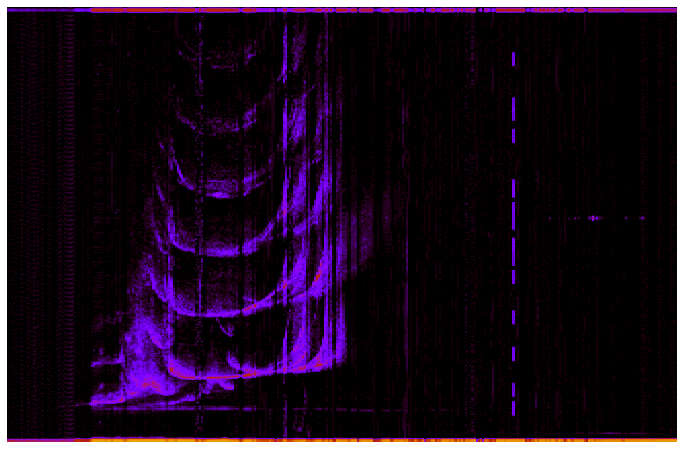

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
vipir_image(ax, cdf)



In [7]:
sjj = vipir(r"./netcdf/SJJ18_2019315011002.NGI")

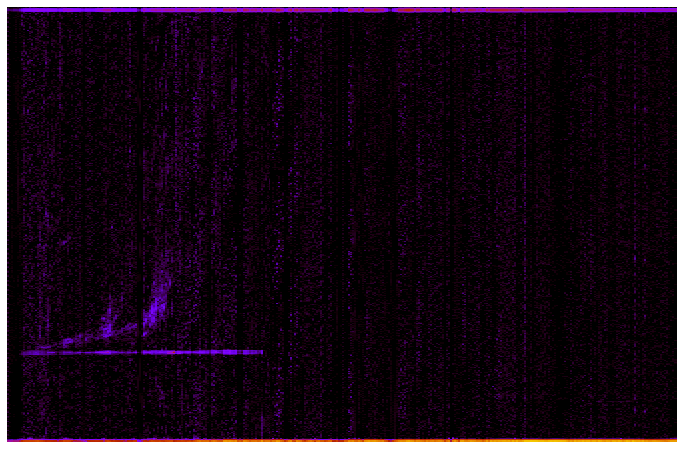

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
vipir_image(ax, sjj)

In [9]:
jv4 = vipir(r'./netcdf/JV433_2019323104500.NGI')

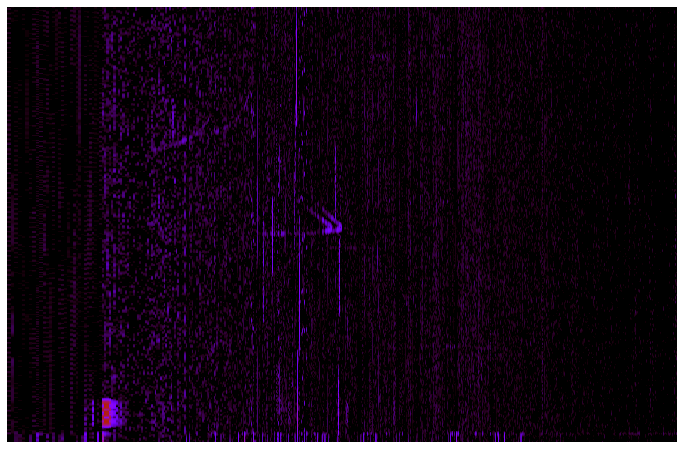

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
vipir_image(ax, jv4)

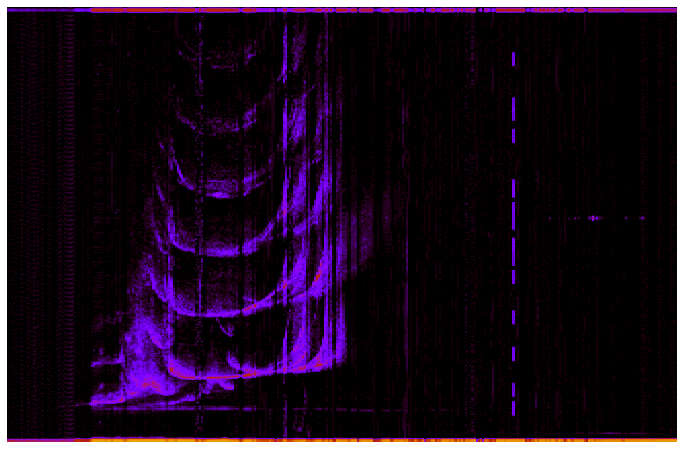

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
vipir_image(ax, cdf)
plt.savefig('testplot.png')
Image.open('testplot.png').convert('RGB').save('testplot.jpg','JPEG')